In [61]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import factorial
import scipy.optimize as opt
import math
import pandas as pd
# import csv
from matplotlib import rc, rcParams

In [62]:

#Import pendulum instead
with open('pendulum.csv', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
    dataDF = pd.read_csv(file)
    data1 = dataDF['g (m/s2)']
    print(dataDF)
    #print(data1)



def remove_weird():
    dataFiltered = dataDF[(dataDF['g (m/s2)'] < 30)]
    print(dataFiltered)
    return dataFiltered

dataFiltered = remove_weird()
    #numSamples = 2000
    #intervalTime = 10 #Range in seconds

    # Alex 18/09 NOTE This function will crash for index out of range, and may run indefinitely in the case of data with bad time.
    #while time < (numIntervals * intervalTime * 1000): # Data is in ms 
    #    data1 += [file.readline().split()]
    #    data1[-1][3] = int(data1[-1][3])
    #    time = data1[-1][3]

# Bin function graciously borrowed from pythonForJLAB https://github.mit.edu/juniorlab/Python-Intro/blob/master/pythonForJLAB.ipynb

# Take out zero bins. The discussion for why I do this is beyond the scope of this intro, ask the instructors
# It's not important to know what's going on in this function if you don't want to know.
# If you do want to know, you'll have to think about it
# Alex 18/09 For a time interval of 10s, its really unlikely that we will get empty bins but we should do this for robustness.
def delete_zeros(bins,counts,err):
    '''
    Inputs:
    bins = the frequency bin centers
    counts = the frequency data
    err = the error data
    Output:
    new_bins = bin centers, but if the frequency of a bin center is zero the bin is removed
    new_counts = frequency data, but if "                    "
    new_err = error data, but if "                       "
    '''
    zeros = np.where(counts==0) # Find the indices where the frequency data is zero
    mask = np.ones(len(counts),dtype=bool) # create a mask of True values
    mask[zeros[0]] = False # Turn the zero parts of the mask False
    print(counts[mask])
    new_counts = counts[mask] # Recreate the bin data without the False parts
    new_bins = bins[mask] # Recreate the frequency data without the False parts
    new_err = err[mask] # Recrete the "      "
    return new_bins, new_counts, new_err




               label  g (m/s2) stat uncert     sys uncert total uncert
0    20.Sep.X.B01.01     9.830      0.0075  "+0.35,-0.44"          NaN
1    20.Sep.X.B01.02     9.060        0.14           0.23          NaN
2    20.Sep.X.B01.03     9.790        0.02           0.02          NaN
3    20.Sep.X.B01.04     9.882       0.016           0.13          NaN
4    20.Sep.X.B01.05   978.000          17              8          NaN
..               ...       ...         ...            ...          ...
357  24.Feb.B.B01.05     9.620        0.29           0.03          NaN
358  24.Feb.B.B02.01     9.820         NaN            NaN         0.38
359  24.Feb.B.B02.02     9.800        0.06           0.01          NaN
360  24.Feb.B.B02.03     9.848       0.057          0.178          NaN
361  24.Feb.B.B02.04    10.660       0.078          0.019          NaN

[362 rows x 5 columns]
               label  g (m/s2) stat uncert     sys uncert total uncert
0    20.Sep.X.B01.01     9.830      0.0075  "+0.35,-0

[  1.   0.   0.   0.   2.   0.   0.   3.   2.   2.   3.   8.   9.  10.
  20.  68. 152.  28.  18.   8.   8.   4.   3.   4.   1.   1.   0.   0.
   1.   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   1.]
[ 6.95   7.125  7.3    7.475  7.65   7.825  8.     8.175  8.35   8.525
  8.7    8.875  9.05   9.225  9.4    9.575  9.75   9.925 10.1   10.275
 10.45  10.625 10.8   10.975 11.15  11.325 11.5   11.675 11.85  12.025
 12.2   12.375 12.55  12.725 12.9   13.075 13.25  13.425 13.6   13.775
 13.95  14.125 14.3   14.475 14.65  14.825 15.    15.175 15.35  15.525
 15.7  ]
[ 7.0375  7.2125  7.3875  7.5625  7.7375  7.9125  8.0875  8.2625  8.4375
  8.6125  8.7875  8.9625  9.1375  9.3125  9.4875  9.6625  9.8375 10.0125
 10.1875 10.3625 10.5375 10.7125 10.8875 11.0625 11.2375 11.4125 11.5875
 11.7625 11.9375 12.1125 12.2875 12.4625 12.6375 12.8125 12.9875 13.1625
 13.3375 13.5125 13.6875 13.8625 14.0375 14.2125 14.3875 14.5625 14.7375
 14.9125 15.0875

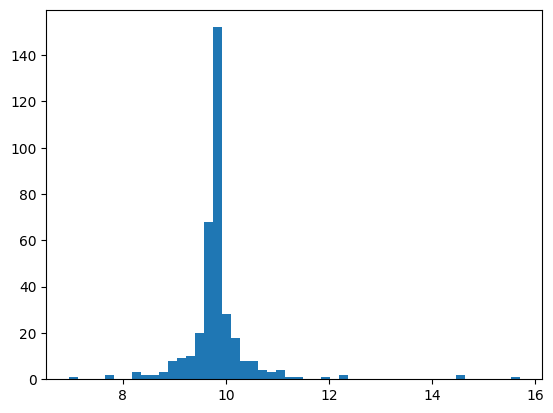

In [63]:
# Bin data into hist

counts, edges, patches = plt.hist(dataFiltered['g (m/s2)'], 50)
print(counts)
print(edges)
centers = edges[0:-1] + 0.5*(edges.max() - edges.min())/(len(edges)-1)
print(centers)


[  1.   2.   3.   2.   2.   3.   8.   9.  10.  20.  68. 152.  28.  18.
   8.   8.   4.   3.   4.   1.   1.   1.   2.   2.   1.]
Calulated Chi2: {0} 21.707263439383127
Chi2 probability: 0.47747339070146044


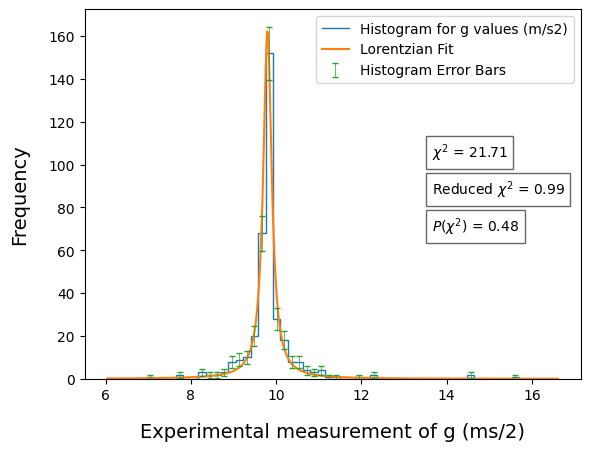

popt, pcov, uncert: [19.6726222   9.79577041  0.12124475], [[ 1.15416400e+00 -1.43009463e-03  2.02851096e-04]
 [-1.43009463e-03  8.94461809e-05  3.42902068e-05]
 [ 2.02851096e-04  3.42902068e-05  1.10020660e-04]],[1.07432025 0.0094576  0.01048907]


In [80]:
# Lorentzian from fittemplate
def lorentzian(x, A, mu, gamma): return A * gamma / ( (x-mu)**2 + gamma**2 )
import sys
sys.path.insert(0, '../fitTemplate-master/')
from levmar import *
from scipy import optimize as opt

# Plot histogram of measurement values
plt.stairs(counts, edges, label = 'Histogram for g values (m/s2)')
#plt.show()
# Remove zeros for fitting
new_cent, new_val, new_err = delete_zeros(centers, counts, np.sqrt(counts))
# perform fitting
popt, pcov = opt.curve_fit(xdata = new_cent, ydata = new_val, sigma = new_err, f = lorentzian, p0 = [2, dataFiltered['g (m/s2)'].mean(),2])
#popt, pcov = opt.curve_fit(f=levmar, xdata=new_cent, ydata=new_val, sigma=new_err, p0=[5,200], absolute_sigma=True, maxfev = 100000) # Fit function

uncert = np.sqrt(np.diag(pcov)) # Extract uncertainty from fit

# Plot fitted Lorentzian
x = np.linspace(start=new_cent.min()-1,stop=new_cent.max()+1,num=1000,endpoint=True) # Define x for smoother plotting of our poisson fit function
plt.plot(x, lorentzian(x, popt[0], popt[1],popt[2]), label = 'Lorentzian Fit')
# Plot error bars for histogram
plt.errorbar(new_cent, new_val, yerr = new_err, linewidth=.5, ls='none', capsize=2, label = 'Histogram Error Bars') # Plot actual data

# Time to calculate chi2
# More functions from the physics github!
def chisq(func,popt,x,y,sig):
    '''
    Inputs:
    func = function to generate expected value
    x = x data
    y = y data
    sig = sigma data
    Outputs:
    chi2 = chi-squared value
    '''
    expected_vals = func(x, *popt) # Again, better off using *popt
    return np.sum((y-expected_vals)**2/sig**2)

chi2 = chisq(lorentzian,popt,new_cent,new_val,new_err)
print('Calulated Chi2: {0}',format(chi2))
dof = len(new_cent)-3
chi2v = chi2/dof
chi2_probs = 1 - stats.chi2.cdf(chi2,dof)
print('Chi2 probability: {0}'.format(chi2_probs))

plt.text(0.7, 0.6, r'$\chi^2$ = {:.2f}'.format(chi2), transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.7, 0.5, r'Reduced $\chi^2$ = {:.2f}'.format(chi2v), transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.7, 0.4, r'$P(\chi^2)$ = {:.2f}'.format(chi2_probs), transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

plt.xlabel(r'Experimental measurement of g (ms/2)', fontsize=14, labelpad=14)
plt.ylabel(r'Frequency', fontsize=14, labelpad= 14)
plt.legend() # Substitute arguments with legend args
#plt.title(r'Poisson fit curve with plotted data including error', fontsize = 25)
plt.show()
print("popt, pcov, uncert: " + str(popt) +", "+ str(pcov) +","+ str(uncert))





In [65]:
# Time to calculate chi2
# More functions from the physics github!
def chisq(func,popt,x,y,sig):
    '''
    Inputs:
    func = function to generate expected value
    x = x data
    y = y data
    sig = sigma data
    Outputs:
    chi2 = chi-squared value
    '''
    expected_vals = func(x, *popt) # Again, better off using *popt
    return np.sum((y-expected_vals)**2/sig**2)

chi2 = chisq(lorentzian,popt,new_cent,new_val,new_err)
print('Calulated Chi2: {0}',format(chi2))
dof = len(new_cent)-2
chi2_probs = 1 - stats.chi2.cdf(chi2,dof)
print('Chi2 probability: {0}'.format(chi2_probs))


Calulated Chi2: {0} 21.707263439383127
Chi2 probability: 0.5379779453247902
